## **Project Description: TV-Style Weather Forecast Visualization**  

### **Project Overview**  
This project provides a **TV-style weather visualization** that displays **hourly temperature forecasts** for **Qesm New Beni Suef City, Bani Suwayf, Egypt**. It uses real-time weather data from an online API and presents it in a **visually appealing format**, making it easy to interpret. The graph features a **dark-themed background**, a **smooth temperature curve**, and clearly labeled **hours (AM/PM) and temperature values (°C)**.  

### **Key Features**  
- **Real-Time Weather Data Fetching:** The project retrieves live temperature data using an API.  
- **TV-Style Graph Visualization:** The design resembles professional weather broadcasts.  
- **Dark Themed Graph:** Uses a **modern navy blue** background with contrasting cyan temperature curves.  
- **AM/PM Hour Formatting:** Displays **hourly temperature trends** in an easy-to-read **12-hour format** (e.g., **10 AM, 12 PM**).  
- **Temperature Labels in Celsius:** The **Y-axis** is formatted with temperatures ranging from **10°C to 30°C**.  
- **Location Title at the Top:** Clearly displays **"Qesm New Beni Suef City, Bani Suwayf, Egypt"** in bold white text.  
- **Grid & Smoothing:** A **dashed grid** is added to improve readability.  
- **Matplotlib for Graphs:** Uses **Matplotlib** to render a smooth, visually appealing graph.  

### **Technologies Used**  
- **Python** (Main Language)  
- **Matplotlib** (For Graph Visualization)  
- **Requests** (For Fetching Weather Data)  
- **Datetime** (For Converting Time Formats)  

### **How It Works**  
1. **Fetches real-time hourly temperature data** from an API.  
2. **Formats the time in a 12-hour AM/PM format** (e.g., 10 AM, 12 PM).  
3. **Plots a smooth temperature curve** with a **cyan-colored line and markers**.  
4. **Adds a filled area below the curve** to enhance visual appeal.  
5. **Displays temperature values on the Y-axis** (from **10°C to 30°C**).  
6. **Shows the location at the top** in a **bold white title**.  

### **Potential Enhancements**  
- **Add Wind Speed & Humidity Data** for more insights.  
- **Make It Interactive** with real-time updates.  
- **Include Weekly Forecasts** instead of just hourly data.  
- **Improve UI Design** with animations & icons (sun, rain, clouds).  

### **Conclusion**  
This project provides a **professional weather visualization** using **Python and Matplotlib**. The clean and modern design ensures **easy readability**, and it can be extended further for advanced **forecasting and weather monitoring applications**. 



In [ ]:
%pip install pandas numpy scikit-learn requests matplotlib

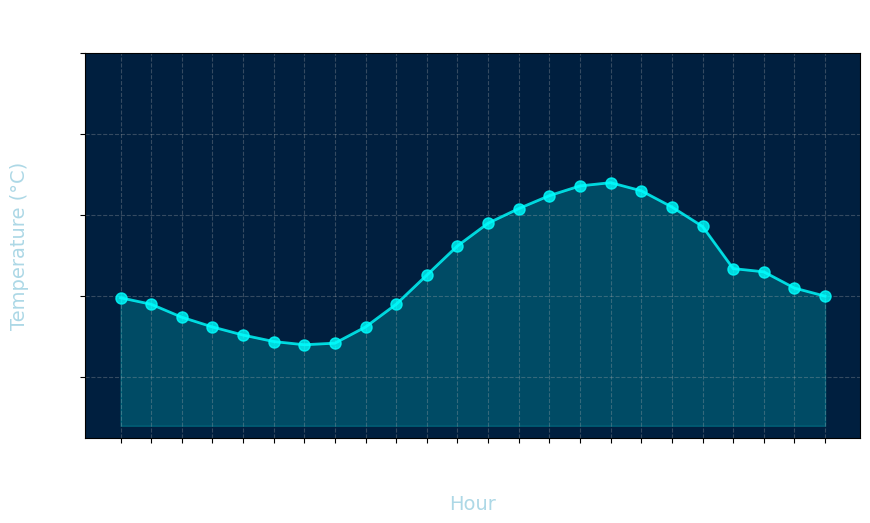

In [2]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime

#  1️- Fetch Real-Time Weather Data
def fetch_weather():
    api_key = "your_api_key"  #  Replace with your real API key
    lat, lon = 29.046, 31.129  # Qesm New Beni Suef City, Egypt
    url = f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&hourly=temperature_2m&timezone=Africa/Cairo"

    response = requests.get(url)
    if response.status_code != 200:
        raise Exception("API request failed!")

    return response.json()["hourly"]

#  2️- Prepare Data
data = fetch_weather()
time_data = data["time"][:24]  # Take only the first 24 hours
temperatures = data["temperature_2m"][:24]  # Match dimension

# Convert time to hours in 12-hour AM/PM format
hours = [datetime.strptime(t, "%Y-%m-%dT%H:%M").strftime("%I %p") for t in time_data]

#  3️- Plot Graph
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_facecolor("#001F3F")  # Dark Blue Background

# Line Plot
plt.plot(hours, temperatures, marker="o", linestyle="-", color="cyan", linewidth=2, markersize=8, alpha=0.8)

# Fill Area
plt.fill_between(hours, temperatures, min(temperatures) - 5, color="cyan", alpha=0.2)

# Labels
plt.xticks(rotation=45, fontsize=10, color="white")  # X-axis: 10 AM, 12 PM, etc.
plt.yticks(range(10, 35, 5), [f"{t}°C" for t in range(10, 35, 5)], fontsize=12, color="white")  # Y-axis: 10°C - 30°C
plt.xlabel("Hour", fontsize=14, color="lightblue")
plt.ylabel("Temperature (°C)", fontsize=14, color="lightblue")

# Location Title at the TOP
plt.title("Qesm New Beni Suef City, Bani Suwayf, Egypt", fontsize=16, color="white", fontweight="bold", pad=20)

# Grid & Style
plt.grid(alpha=0.3, linestyle="--")

# Show Plot
plt.show()
